# Agriculture dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the excel from pandas 
df_agri=pd.read_excel("train_agriculture.xlsx")
df_agri

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
#getting the info of dataset like datatype,columns name
df_agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [4]:
#checking the null values in dataset in any
df_agri.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

- __Number_Weeks_Used__ column has 442 missing values,we don't need to remove this column as its just 9% of total data,which can be filled by mean

In [5]:
df_agri.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


__Findings:__
   - __Mean is greater than Median in Maximum Insects_Count__ attribute which means its right skewed data
   - Maximum Insects_Count=4097 and Minimum insect count=150
   - maximum number of dose used in a week=95
   - pesticide used for maximum duration(number of weeks) in a crop=66 
   - from this we get to know more insects count mean more number of weeks pesticide need to be used 

#### Filling the null values

In [6]:
#filling the null values with column mean
df_agri["Number_Weeks_Used"]=df_agri["Number_Weeks_Used"].fillna(df_agri["Number_Weeks_Used"].mean())

In [7]:
#rounding off the column to make number of weeks in proper format
df_agri["Number_Weeks_Used"]=df_agri["Number_Weeks_Used"].round(decimals=0)

In [8]:
df_agri

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,29.0,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [9]:
#checking the unique value of attributes 
df_agri.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [10]:
#checking the total counts of each attribute group wise
for col in df_agri.select_dtypes(exclude='object'):
    print(df_agri[col].value_counts())
    print("\n")

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64


0    3565
1    1034
Name: Crop_Type, dtype: int64


0    2407
1    2192
Name: Soil_Type, dtype: int64


2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64


29.0    550
20.0    209
30.0    194
25.0    165
40.0    133
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64


0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116


# Exploratory Data Analysis

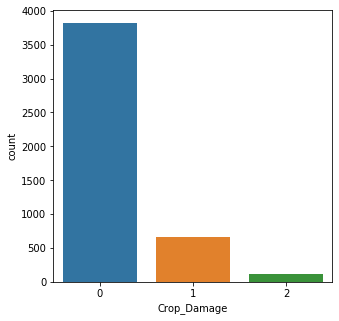

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x="Crop_Damage",data=df_agri)

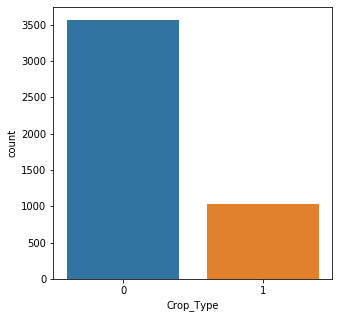

In [12]:
#checking by graph which crop is widely used by farmers
plt.figure(figsize=(5,5))
sns.countplot(x="Crop_Type",data=df_agri)

__Observation:__
    Crop type 0 is mostly grown by farmers in the field

Crop_Type
0    4916808
1    1351631
Name: Estimated_Insects_Count, dtype: int64


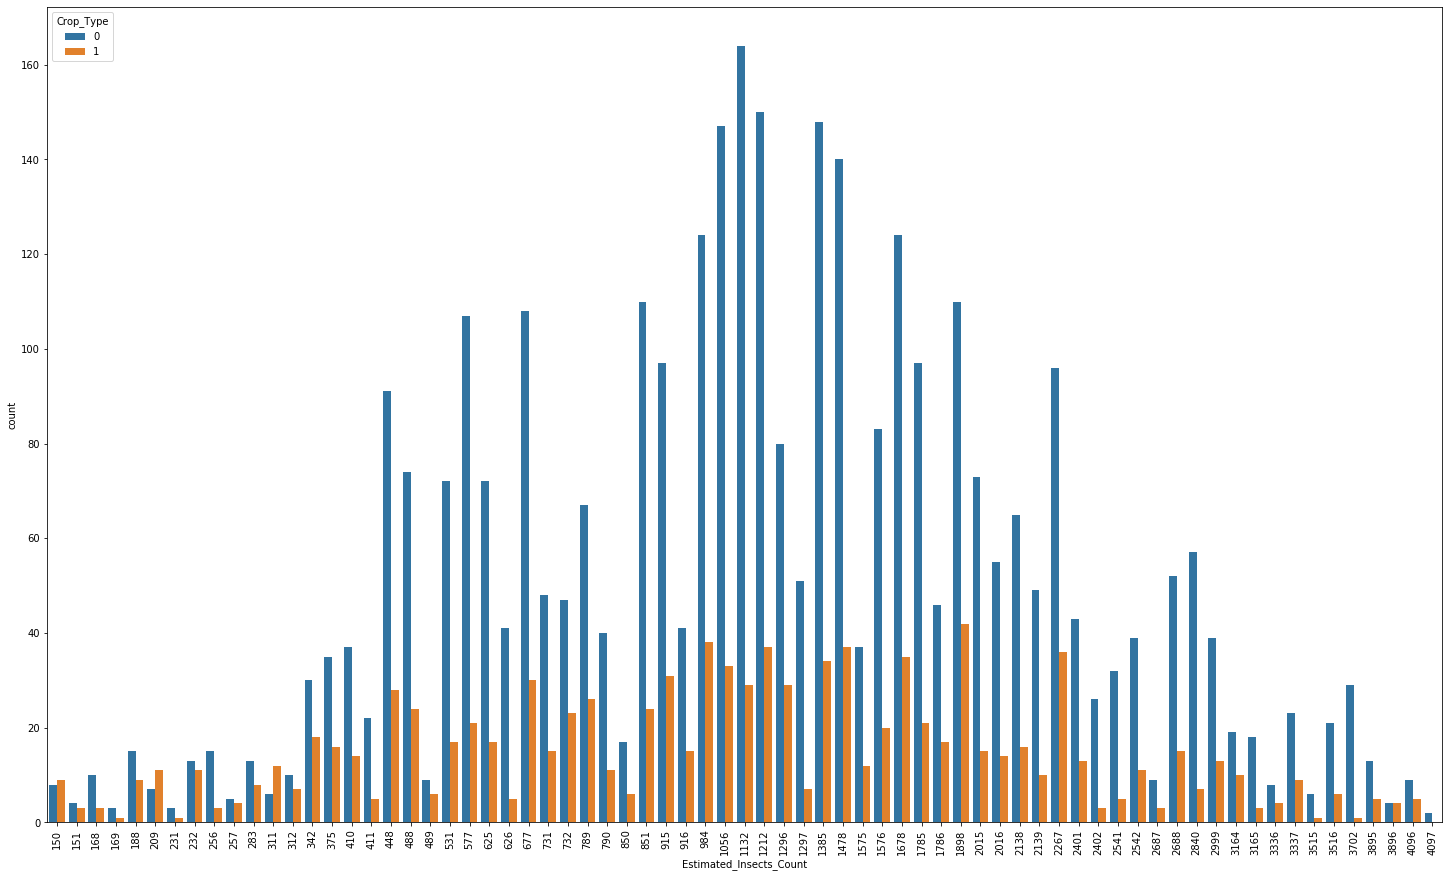

In [13]:
#plotting graph to check which crop has most estimated insects count
plt.figure(figsize=(25,15))
sns.countplot(x="Estimated_Insects_Count",hue="Crop_Type",data=df_agri)
plt.xticks(rotation=90)
print(df_agri.groupby("Crop_Type")["Estimated_Insects_Count"].sum())

([<matplotlib.patches.Wedge at 0x28c0ac1a08>,
 [Text(-0.7792016182102989, 0.6267733547132102, ''),
  Text(0.7792016182102988, -0.6267733547132103, '')],
 [Text(-0.38960080910514944, 0.3133866773566051, '78.4%'),
  Text(0.3896008091051494, -0.31338667735660514, '21.6%')])

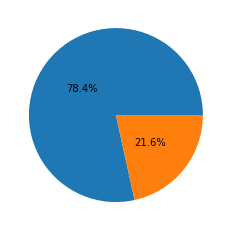

In [14]:
#pie plot to know the effect of insects is in which crop most
plt.pie(x=df_agri.groupby("Crop_Type")["Estimated_Insects_Count"].sum(),autopct='%1.1f%%', pctdistance=.5, labeldistance=1.0)

__Observations:__
   - From both graph above tells the crop 0 have maximum insects of around 78.4% of total.
   -  insects count on crop type 0 =4916808
   - insects count on crop type 1 =1351631
    

#### When pesticide is used most?

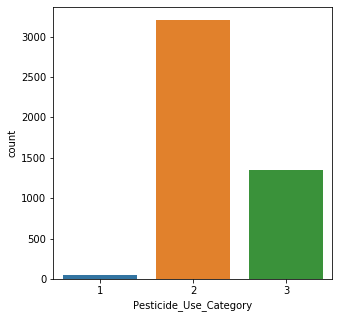

In [15]:
# graph of countplot for attribute "Pesticide_Use_Category"
plt.figure(figsize=(5,5))
sns.countplot(x="Pesticide_Use_Category",data=df_agri)

__Pesticide_Use_Category- 2__ is previously_used of pesticide by farmers mostly and least is __Category- 1__(never used).

### Checking crop damage on the type of crop

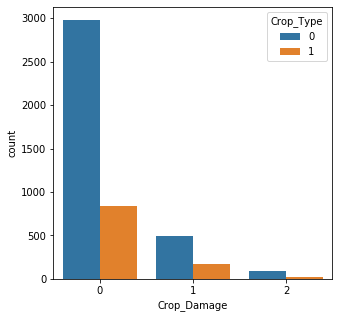

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x='Crop_Damage',hue="Crop_Type",data=df_agri)

__Observations:__
   - Maximum of the both type of Crop is still alive
   - crop type 0 is mostly damage by other cause and also by pesticide as compared to crop type 1

### Effect of pesticide on crop 

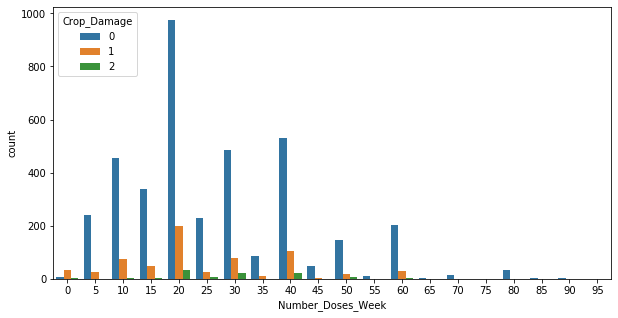

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Number_Doses_Week',hue="Crop_Damage",data=df_agri)

__Observations:__
   - when number of dose per week is 20,then the crops are mostly alive and will also suitable for consumption
   - But when dose per week is greater 60,then mostly crops are damaged even not suitable for consumption.
   - Also dose per week less then 5,the crop gets damage due to other causes. 

### Checking which Crop is need to grow according to which season

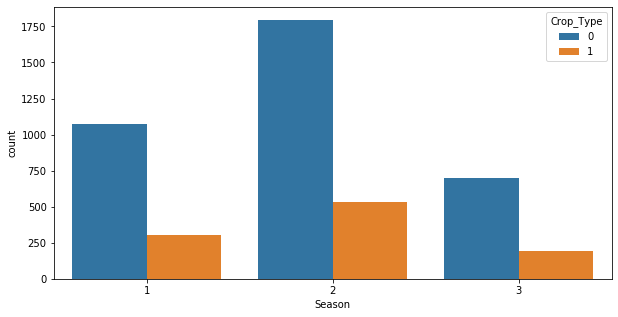

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(hue='Crop_Type',x="Season",data=df_agri)

__Observations:__
   - We can conclude from the graph that both the type of crop are mostly grown in __season 2__
   - Growing those crops in other season is not giving best results so its important to grow them is season 2 especially for         crop type 1 as there is big difference in the growth of crop in between season 2 and other seasons for it.

### Calculating number of insects/square meter in a soil

Soil_Type
0    3564684
1    2703755
Name: Estimated_Insects_Count, dtype: int64


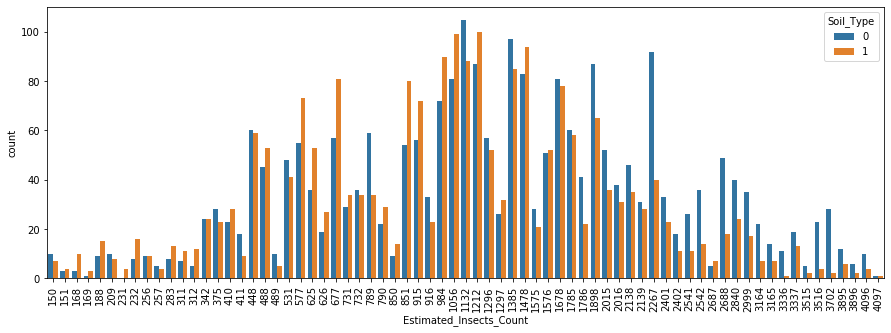

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(hue='Soil_Type',x="Estimated_Insects_Count",data=df_agri)
plt.xticks(rotation=90)
print(df_agri.groupby("Soil_Type")["Estimated_Insects_Count"].sum())

__Observations:__
   - we can observe that __maximum estimated insects count__ in both soil_type is around between __1056 and 1212__.
   - __Soil type 0__ has maximum insects count=3564684,which means soil type 0 has more number of insects per square meter,so it requires more use of pesticides so crop is not damage by insects.

# Distribution plots

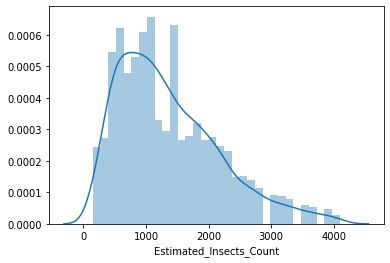

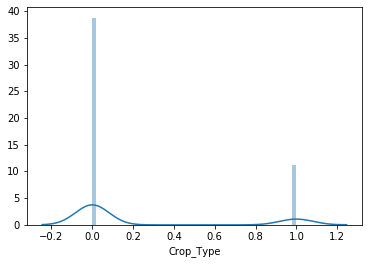

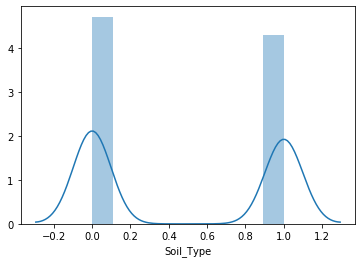

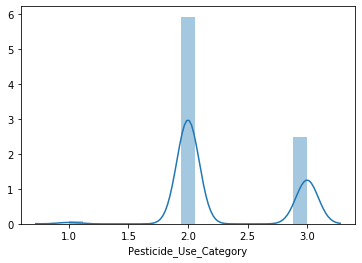

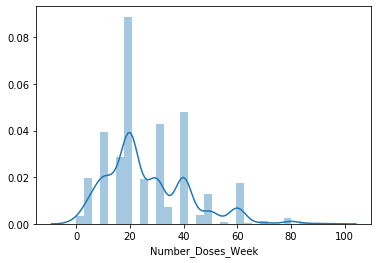

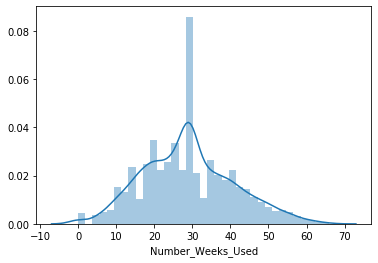

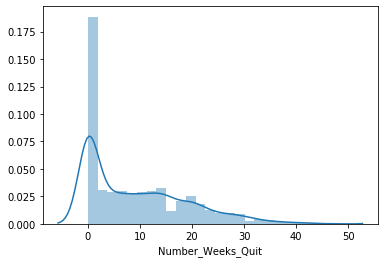

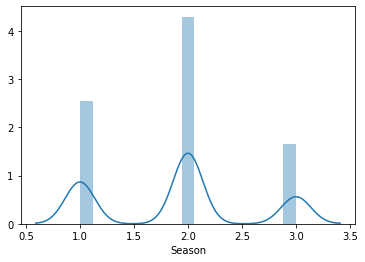

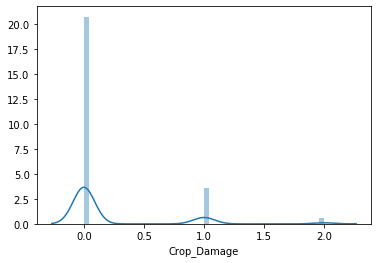

In [20]:
#drawing distribution plot for all attributes:
for col in df_agri.select_dtypes(exclude='object'):
    sns.distplot(df_agri[col])
    plt.show()

### Boxplots for checking outliners

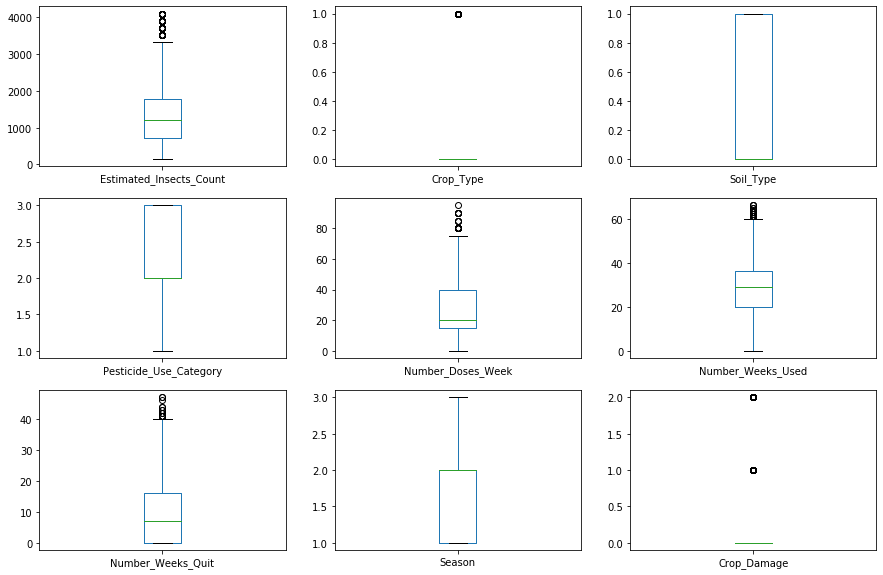

In [21]:
df_agri.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))
plt.show()

__Observations:__
 -  we can observe that some attributes have outliners which need to be remove for good machine learning

# Correlation

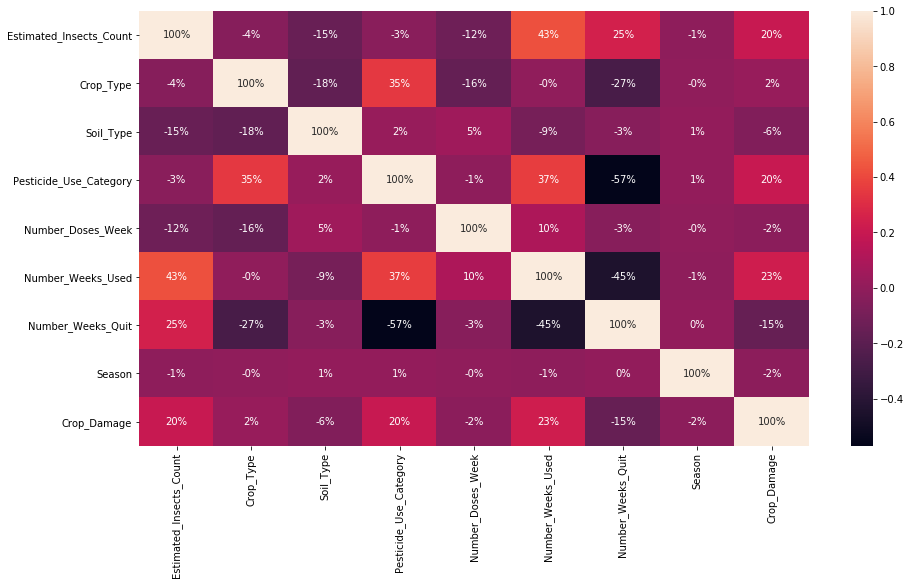

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df_agri.corr(),annot=True,fmt='0.0%')

__observations:__
- crop damage shows good relation with insects count,pesticide use and number of weeks pesticides use,so these factors are very important for good nourishments of crop.
- more insects means damage of more crops and vice versa.
- proper use of pesticide over a period of time improves quality of crop.

# Preprocessing

#### Dropping unnecessary column

In [23]:
#we can drop column ID as it will not give necessary information about the crop damage
df_agri.drop(["ID"],axis=1,inplace=True)

# Removing Outliners:

In [24]:
# importing zscore
from scipy.stats import zscore
z_score=np.abs(zscore(df_agri))
print("shape of new data before removing outliners",df_agri.shape)
#removing all the values which are greater then threshold=3
df_x=df_agri[(z_score<3).all(axis=1)]
# shape of new data after removing outliners
print("shape of new data after removing outliners",df_x.shape)

shape of new data before removing outliners (4599, 9)
shape of new data after removing outliners (4370, 9)


- removing outliners was removing our target class 2 totally so which will make data learning improper so this time i dont use data which has no outlines.

In [25]:
df_x.nunique()

Estimated_Insects_Count    67
Crop_Type                   2
Soil_Type                   2
Pesticide_Use_Category      3
Number_Doses_Week          15
Number_Weeks_Used          61
Number_Weeks_Quit          39
Season                      3
Crop_Damage                 2
dtype: int64

- After zscore crop damage has only 2 unique values left which was 3 in early.so i will not dataset in which outliners is removed 

### Split the dataset

In [26]:
x=df_agri.drop(["Crop_Damage"],axis=1)
y=df_agri["Crop_Damage"]

In [27]:
y.unique()

array([0, 1, 2], dtype=int64)

In [28]:
#checking the sknewness of the data
x.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.276034
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [29]:
#improving the sknewness by log tranformation
for col in x.columns:
    if x[col].skew()>0.55:
        x[col]=np.log1p(x[col])

In [30]:
#checking again the sknewness
x.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.416624
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.276034
Number_Weeks_Quit         -0.199671
Season                     0.144841
dtype: float64

# Removing Outliners:

In [31]:
#converting all the data into one standard format by using Standard scaler  
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [32]:
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.068000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.099918,1.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.162279,1.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.162279,1.0,1.0,0.0,0.0,0.0,0.0,0.5
4,0.248548,1.0,0.0,0.0,0.0,0.0,0.0,0.5


In [33]:
#lets check again the sknewness
x.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.416624
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.276034
Number_Weeks_Quit         -0.199671
Season                     0.144841
dtype: float64

# Training Model

In [34]:
#importing model
from sklearn.model_selection import train_test_split

#importing all the classification alogrithm 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing boosting technique
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier

#importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
#using classification algorithm with the help of loop
def model(m):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
        m.fit(x_train,y_train)
        predm=m.predict(x_test)
        a_score=accuracy_score(y_test,predm)
        if a_score>max_r_score:
            max_r_score=a_score
            final_r_state=r_state
    print("max accuracy score of ",m,"at random state",final_r_state,"is ",a_score)   
    
    print("confusion_matrix:\n  ",confusion_matrix(y_test,predm))
    print('classification_report\n  ',classification_report(y_test,predm))
    print("-------------------------------------------------------------------------------------------------------------")

In [52]:
#applying all the model through the loop
Model=[MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in Model:
    model(m)

max accuracy score of  MultinomialNB() at random state 86 is  0.8318840579710145
confusion_matrix:
   [[1148    0    0]
 [ 201    0    0]
 [  31    0    0]]
classification_report
                 precision    recall  f1-score   support

           0       0.83      1.00      0.91      1148
           1       0.00      0.00      0.00       201
           2       0.00      0.00      0.00        31

    accuracy                           0.83      1380
   macro avg       0.28      0.33      0.30      1380
weighted avg       0.69      0.83      0.76      1380

-------------------------------------------------------------------------------------------------------------
max accuracy score of  SVC() at random state 91 is  0.8369565217391305
confusion_matrix:
   [[1145    3    0]
 [ 191   10    0]
 [  29    2    0]]
classification_report
                 precision    recall  f1-score   support

           0       0.84      1.00      0.91      1148
           1       0.67      0.05      0.09   

__Observations:__
   -  __MultinomialNB and SVC__ are giving high accuracy but if you see in models the precision is zero for target class 2 and hence the overall f1 score will also be low and our model will not precisely analyse the target of class 2
   - So I will choose __ExtraTreesClassifier__ its the one which is giving some precision for every target class and more than accuracy precision must be there
   - Accuracy of ExtraTreesClassifier will be improved by gridsearch for get get best parameter

# cross_val_score

In [53]:
#using the cross validation
from sklearn.model_selection import cross_val_score
Model=[MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for i in Model:
    scores=cross_val_score(i,x,y,cv=10,scoring="accuracy")
    print("scores of ",i)
    print("mean score",scores.mean())
    print("Standard deviation",scores.std())
    print('\n-------------------------------------------------------------------------------------------------------')

scores of  MultinomialNB()
mean score 0.8306157052192857
Standard deviation 0.0005427678317703854

-------------------------------------------------------------------------------------------------------
scores of  SVC()
mean score 0.8221374443497206
Standard deviation 0.022254912483641476

-------------------------------------------------------------------------------------------------------
scores of  DecisionTreeClassifier()
mean score 0.6845107511603675
Standard deviation 0.058759521235853616

-------------------------------------------------------------------------------------------------------
scores of  KNeighborsClassifier()
mean score 0.7756142843610874
Standard deviation 0.05849216011457309

-------------------------------------------------------------------------------------------------------
scores of  RandomForestClassifier()
mean score 0.7725698588614189
Standard deviation 0.054175176979730316

-------------------------------------------------------------------------------

Mean score of __ExtraTreesClassifier is 0.76__ and ___accuracy score__ and __mean score__ are approx.So we can go with this Model

### Using GridSearchCV to get best parameters of ExtraTreesClassifier

In [54]:
#importing gridsearchcv
from sklearn.model_selection import GridSearchCV
ec = ExtraTreesClassifier()
params = {'n_estimators': [40, 42],'criterion': [ 'gini', 'entropy']}
bc_grid = GridSearchCV(estimator=ec,param_grid=params, scoring='accuracy', cv=5)
bc_grid.fit(x,y)
best_params = bc_grid.best_params_
print(best_params)

{'criterion': 'gini', 'n_estimators': 40}


In [55]:
#now using the best parameter we will get accuracy score
ec = ExtraTreesClassifier(criterion='gini',n_estimators=40)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=69)
ec.fit(x_train,y_train)
ec.score(x_train,y_train)
pred=ec.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.803623188405797
[[1070   68    8]
 [ 158   38    1]
 [  25   11    1]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1146
           1       0.32      0.19      0.24       197
           2       0.10      0.03      0.04        37

    accuracy                           0.80      1380
   macro avg       0.43      0.38      0.39      1380
weighted avg       0.76      0.80      0.78      1380



In [57]:
#checking again the cross validation score
ec = ExtraTreesClassifier(criterion='gini',n_estimators=40)
scores=cross_val_score(ec,x,y,cv=10,scoring="accuracy")
print("scores of ",i)
print("mean score",scores.mean())
print("Standard deviation",scores.std())
print('\n-------------------------------------------------------------------------------------------------------')

scores of  ExtraTreesClassifier()
mean score 0.760612863502889
Standard deviation 0.05987198282744775

-------------------------------------------------------------------------------------------------------


- So model is prepared with best parameter and now we will save this model and later check this model to predict new dataset

# Saving Model

In [58]:
import joblib
joblib.dump(ec,'ec.agri.pkl')

['ec.agri.pkl']

# Testing the New dataset

In [43]:
#reading test data the excel from pandas 
df_test=pd.read_excel("test_agriculture.xlsx")
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


### Firstly need to do some data processing

In [44]:
#droppping id column
df_test.drop(["ID"],axis=1,inplace=True)

In [45]:
#filling the null values with column mean
df_test["Number_Weeks_Used"]=df_test["Number_Weeks_Used"].fillna(df_test["Number_Weeks_Used"].mean())
#rounding off the column to make number of weeks in proper format
df_test["Number_Weeks_Used"]=df_test["Number_Weeks_Used"].round(decimals=0)

In [46]:
#doing standard scaling  
df_agritest=pd.DataFrame(sc.fit_transform(df_test),columns=df_test.columns)

# Now we will import our model

In [59]:
#load the model from the file
ec_from_joblib=joblib.load('ec.agri.pkl')

In [60]:
#predicting the new dataset
prednew=ec_from_joblib.predict(df_agritest)


In [61]:
#displaying predicted values
prednew

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Conclusion:

- During data processing we have seen some null which has been replaced by the column mean
- In EDA process we can see the crop damage column the maximum crop are still alive and crop which are damaged are due to other   reasons as damage of crop by pesticide is very less.
- We can also tell that proper use of pesticide over a certain range and period will give us best crop otherwise improper use of   pesticide can be harmfull for crop.  
- crops grown is seasons 2 have good production of crop as compared to other crop so it is advisable to grow crops in season 2
- we also have seen removing outliners was removing our target class 2 totally so which will make data learning improper so this time i dont use data which has no outlines.
- Extra classifier is the only model which was learning all the target variables.So that why i choose that model.
- Then I save the model with best parameter using grid search and use it to predict the new dataset.